Class: CS 4412/01

Term: Spring 2020

Name: Sepehr Goshayeshi

Instructor: Ephina Thendral Surendranath

Class Assignment 1

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Import Packages

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.neural_network import MLPClassifier as mlp
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.utils import shuffle
import seaborn as sns

##Read and Prepare Data##

In [ ]:
# load dataset
df = pd.read_csv("/content/drive/My Drive/data/ecoli.csv", delim_whitespace=True,header=None)
# names to Columns
df.columns = ['SeqN', 'mcg', 'gvh', 'lip', 'chg', 'aac', 'alm2', 'alm1', 'pclass']
                      
df = df.drop('SeqN', axis=1) # don't need this, not feature

# Encode Data
df.pclass.replace(('cp', 'im', 'pp', 'imU', 'om', 'omL', 'imL', 'imS'),(0,1,2,3,4,5,6,7), inplace=True)

# Set X and y Values
data = df.values
X = data[:,0:7] # seven features
y = data[:,7] # pclass 

Displaying X and y values

In [ ]:
print("Features:\n", X)

Features:
 [[0.49 0.29 0.48 ... 0.56 0.24 0.35]
 [0.07 0.4  0.48 ... 0.54 0.35 0.44]
 [0.56 0.4  0.48 ... 0.49 0.37 0.46]
 ...
 [0.61 0.6  0.48 ... 0.44 0.39 0.38]
 [0.59 0.61 0.48 ... 0.42 0.42 0.37]
 [0.74 0.74 0.48 ... 0.31 0.53 0.52]]


In [ ]:
print("Output Classes:\n", y)

Output Classes:
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 7. 7. 6. 6. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 5. 5. 5. 5. 5. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 

Split and Shuffle Data for Training and Testing

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, shuffle=True)

## Neural Network

In [ ]:
nn = mlp(hidden_layer_sizes=(300),activation='relu',max_iter=3000)
nn.fit(X_train, y_train)
pred = nn.predict(X_test)

In [ ]:
nn_acc = accuracy_score(pred, y_test)
print('accuracy:',nn_acc)

accuracy: 0.8970588235294118


[[35  0  0  0  0  0  0  0]
 [ 1  8  0  0  0  0  0  0]
 [ 2  0  8  0  0  0  0  0]
 [ 0  1  0  4  0  0  0  0]
 [ 0  0  1  0  4  0  0  0]
 [ 0  0  0  0  0  2  0  0]
 [ 0  0  0  1  0  0  0  0]
 [ 0  1  0  0  0  0  0  0]]


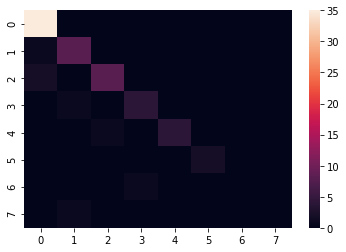

In [ ]:
print(confusion_matrix(y_test, pred))
sns.heatmap(confusion_matrix(y_test, pred))

In [ ]:
nn_precision = precision_score(y_test,pred,average='micro')
nn_recall = recall_score(y_test,pred,average='micro')
print('Precision:',nn_precision)
print('Recall:',nn_recall)

Precision: 0.8970588235294118
Recall: 0.8970588235294118


<BarContainer object of 3 artists>

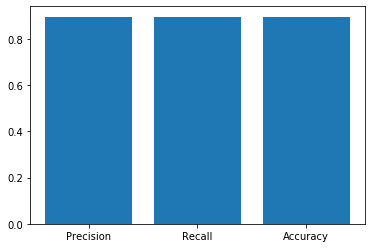

In [ ]:
plt.bar(['Precision','Recall','Accuracy'],[nn_precision, nn_recall, nn_acc])

## Decision Tree Clasifier ##

In [ ]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
predicted = dt.predict(X_test)
dt_acc = accuracy_score(y_test, predicted)
print('accuracy:',dt_acc)

accuracy: 0.8529411764705882


[[35  0  0  0  0  0  0  0]
 [ 1  7  0  1  0  0  0  0]
 [ 3  0  7  0  0  0  0  0]
 [ 0  2  0  3  0  0  0  0]
 [ 0  0  1  0  4  0  0  0]
 [ 0  0  0  0  0  2  0  0]
 [ 0  1  0  0  0  0  0  0]
 [ 0  0  0  1  0  0  0  0]]


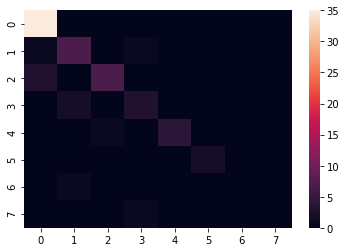

In [ ]:
print(confusion_matrix(y_test, predicted))
sns.heatmap(confusion_matrix(y_test, predicted))

In [ ]:
dt_precision = precision_score(y_test,predicted,average='micro')
dt_recall = recall_score(y_test,predicted,average='micro')
print('Precision:',dt_precision)
print('Recall:',dt_recall)

Precision: 0.8529411764705882
Recall: 0.8529411764705882


<BarContainer object of 3 artists>

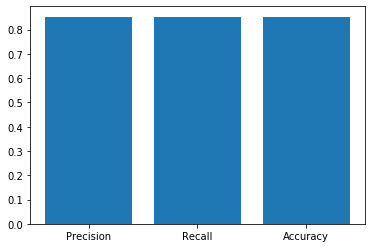

In [ ]:
plt.bar(['Precision','Recall','Accuracy'],[dt_precision, dt_recall, dt_acc])

## Gaussian Naive Bayes ##

In [ ]:
gb = GaussianNB()
gb.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
predicted = gb.predict(X_test)
gb_acc = accuracy_score(y_test, predicted)
print('accuracy:',gb_acc)

accuracy: 0.7941176470588235


[[35  0  0  0  0  0  0  0]
 [ 4  5  0  0  0  0  0  0]
 [ 2  0  8  0  0  0  0  0]
 [ 0  0  2  3  0  0  0  0]
 [ 0  0  4  0  1  0  0  0]
 [ 0  0  0  0  0  2  0  0]
 [ 0  0  0  1  0  0  0  0]
 [ 0  1  0  0  0  0  0  0]]


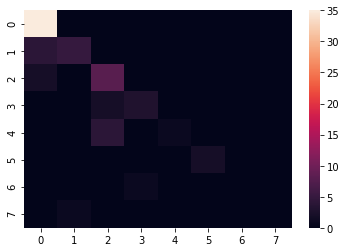

In [ ]:
print(confusion_matrix(y_test, predicted))
sns.heatmap(confusion_matrix(y_test, predicted))

In [ ]:
gb_precision = precision_score(y_test,predicted,average='micro')
gb_recall = recall_score(y_test,predicted,average='micro')
print('Precision:',gb_precision)
print('Recall:',gb_recall)

Precision: 0.7941176470588235
Recall: 0.7941176470588235


<BarContainer object of 3 artists>

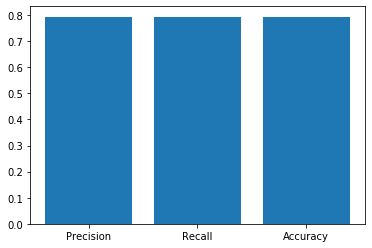

In [ ]:
plt.bar(['Precision','Recall','Accuracy'],[gb_precision, gb_recall, gb_acc])

## Support Vector Machine ##

In [ ]:
sv = svm.SVC(gamma='auto')
sv.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
predicted = sv.predict(X_test)
acc_svm = accuracy_score(y_test, predicted)
print('accuracy:',acc_svm)

accuracy: 0.7205882352941176


[[35  0  0  0  0  0  0  0]
 [ 3  6  0  0  0  0  0  0]
 [ 2  0  8  0  0  0  0  0]
 [ 0  5  0  0  0  0  0  0]
 [ 0  0  5  0  0  0  0  0]
 [ 0  0  2  0  0  0  0  0]
 [ 0  1  0  0  0  0  0  0]
 [ 0  1  0  0  0  0  0  0]]


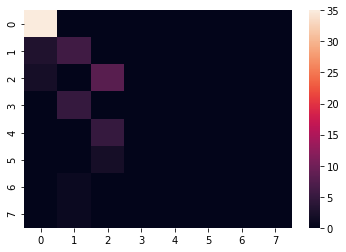

In [ ]:
print(confusion_matrix(y_test, predicted))
sns.heatmap(confusion_matrix(y_test, predicted))

In [ ]:
precision_svm = precision_score(y_test,predicted,average='micro')
recall_svm = recall_score(y_test,predicted,average='micro')
print('Precision:',precision_svm)
print('Recall:',recall_svm)

Precision: 0.7205882352941176
Recall: 0.7205882352941176


<BarContainer object of 3 artists>

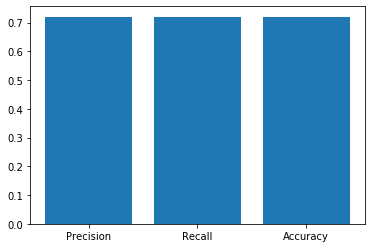

In [ ]:
plt.bar(['Precision','Recall','Accuracy'],[precision_svm, recall_svm, acc_svm])

## Comparing Accuracy for all algorithms ##

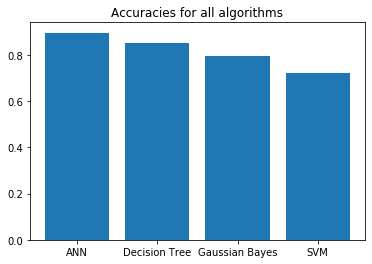

In [ ]:
plt.bar(['ANN','Decision Tree','Gaussian Bayes', 'SVM'],[nn_acc, dt_acc, gb_acc, acc_svm])
plt.title('Accuracies for all algorithms')
plt.show()

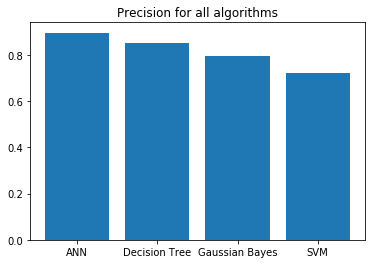

In [ ]:
plt.bar(['ANN','Decision Tree','Gaussian Bayes', 'SVM'],[nn_precision, dt_precision, gb_precision, precision_svm])
plt.title('Precision for all algorithms')
plt.show()

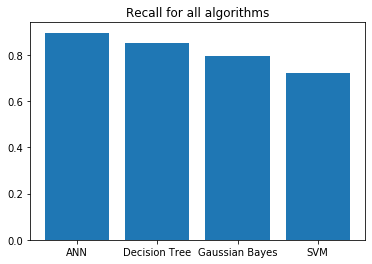

In [ ]:
plt.bar(['ANN','Decision Tree','Gaussian Bayes', 'SVM'],[nn_recall, dt_recall, gb_recall, recall_svm])
plt.title('Recall for all algorithms')
plt.show()